In [27]:
import joblib
import numpy as np

#load neural network
neuralNetwork = joblib.load("nfp3Default/neuralNetwork.pkl")
X_scaler = joblib.load("nfp3Default/neuralNetworkX_scaler.pkl")
y_scaler = joblib.load("nfp3Default/neuralNetworky_scaler.pkl")
nfp=3 #0 for all nfp

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#data set used to train network
df = pd.read_csv("../scans/scan7/scan7Clean.csv.zip")

# select nfp
if (nfp != 0):
    df = df[df['nfp'] == nfp]
    y = df.loc[:, ['rc1', 'zs1', 'eta']]
else:
    y = df.loc[:, ['nfp', 'rc1', 'zs1', 'eta']]

X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]


# Split training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, train_size=0.9,
                     random_state=0)

#scale
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/home/exxxx5/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The Result was:
nfp=3, rc1=0.2616103101661169, zs1=-0.2872573527596376, etabar=-1.4501753434255118

Predicted iota: 1.4278567790730914
Asked iota:     1.5

Predicted axis_length: 1.3012745527106642
Asked axis_length:     1.3

Predicted max_elongation: 5.507250885015638
Asked max_elongation:     6


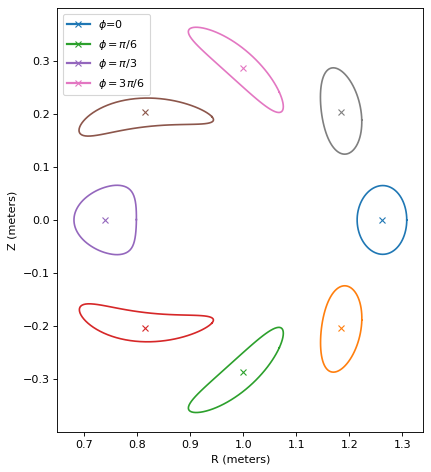

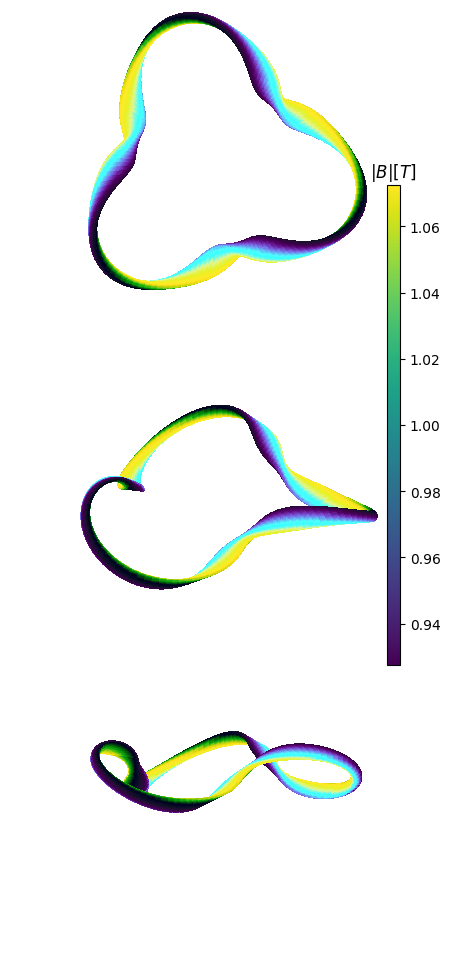

In [29]:
from qsc import Qsc
import numpy as np
#testData -> iota, axis_Length, max_elongation
testData = [[1.5, 1.3, 6]]
testData_scaled = X_scaler.transform(testData)
#predict
predicted = neuralNetwork.predict(testData_scaled)
if nfp == 0:
    nfp, rc1, zs1, etabar = y_scaler.inverse_transform(predicted)[0]
    nfp = int(np.round(nfp))
else:
    rc1, zs1, etabar = y_scaler.inverse_transform(predicted)[0]

print(f"The Result was:\nnfp={nfp}, rc1={rc1}, zs1={zs1}, etabar={etabar}\n")

stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=etabar)
print('Predicted iota:', stel.iota)
print('Asked iota:    ', testData[0][0])
print('')
print('Predicted axis_length:', stel.axis_length / 2. / np.pi)
print('Asked axis_length:    ', testData[0][1])
print('')
print('Predicted max_elongation:', stel.max_elongation)
print('Asked max_elongation:    ', testData[0][2])
stel.plot_boundary(r=0.05)

test stats:
r2:  0.9740552945433786
mse:  0.026058266240215195

training stats:
loss:  0.01315401520740024
validationScore:  0.9747745236591486


Text(0, 0.5, 'Actual')

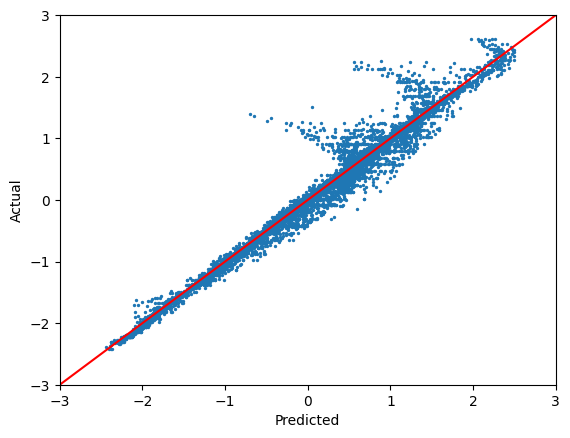

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test_scaled)
print("test stats:")
print("r2: ", r2_score(y_test_scaled, Y_NN))
print("mse: ", mean_squared_error(y_test_scaled, Y_NN))
print("\ntraining stats:")
print("loss: ", neuralNetwork.loss_)
print("validationScore: ", neuralNetwork.best_validation_score_)
plt.scatter(np.ravel(Y_NN),np.ravel(y_test_scaled),s=2)
plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')

[-0.2993814   0.72892906  1.02808006 ...  0.11913864  0.40394858
  0.13917263]
[[-0.31654501  0.06275354  0.35529518]
 [ 0.71565871 -0.29877029 -0.86414641]
 [ 1.01326018 -1.0699523  -1.65248757]
 ...
 [ 0.16024467 -0.1074399  -0.86649535]
 [ 0.37067401  0.18568701 -1.13167519]
 [ 0.16024467 -0.19253662 -0.20006415]]
test stats:
r2:  0.9740552945433786
mse:  0.026058266240215195

training stats:
loss:  0.01315401520740024
validationScore:  0.9747745236591486


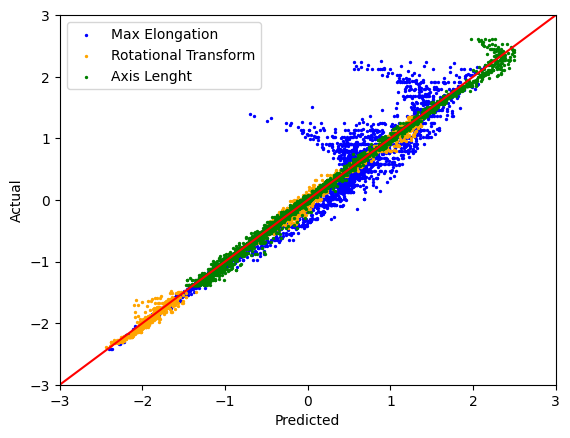

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test_scaled)
print(Y_NN[:,0])
print(y_test_scaled)
print("test stats:")
print("r2: ", r2_score(y_test_scaled, Y_NN))
print("mse: ", mean_squared_error(y_test_scaled, Y_NN))
print("\ntraining stats:")
print("loss: ", neuralNetwork.loss_)
print("validationScore: ", neuralNetwork.best_validation_score_)

fig, ax = plt.subplots()

ax.scatter(Y_NN[:,2],y_test_scaled[:,2], c="blue", label="Max Elongation",s=2)
ax.scatter(Y_NN[:,0],y_test_scaled[:,0], c="orange", label="Rotational Transform", s=2)
ax.scatter(Y_NN[:,1],y_test_scaled[:,1], c="green", label="Axis Lenght", s=2)

plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

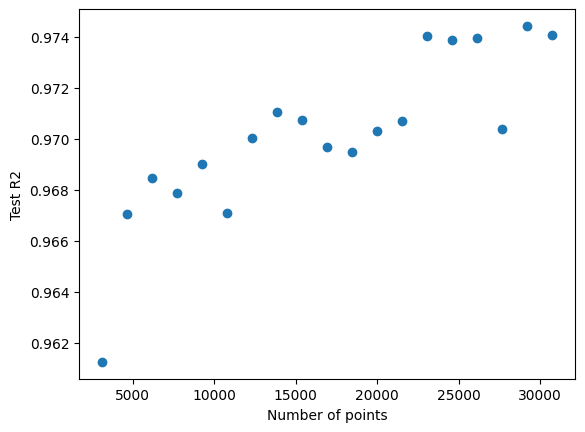

In [11]:
#Plot cardinality
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("nfp3Default/lossCardinality.csv")
plt.scatter(df["numberPoints"],df["testR2"])
plt.xlabel('Number of points')
plt.ylabel('Test R2')
plt.plot
